#### Cargar el dataset y un analisis basico de los datos


In [2]:
import pandas as pd

df = pd.read_csv('dermatology_database_1.csv')

df.columns
df.describe() #Analisis descriptivo de los datos
df.info() #Informacion de los datos (tipo de datos, cantidad de datos, etc)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [3]:
unique_diseases = df["class"].unique()
print(df[['age', 'class']].info())

#Transform 'age' to numeric forcing erros to NaN
df['age'] = pd.to_numeric(df["age"],errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     366 non-null    object
 1   class   366 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None


#### Visualize the relationship between the age and disease type

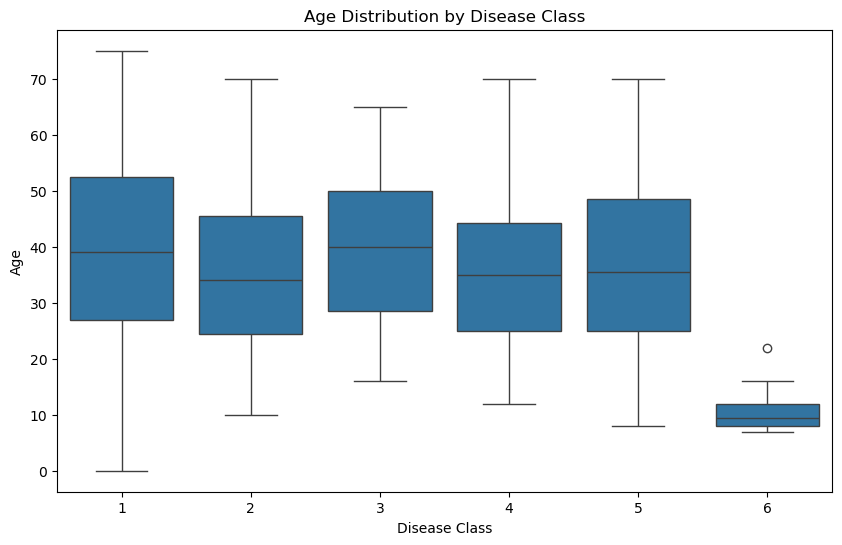

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["class"],y=df["age"])
plt.xlabel("Disease Class")
plt.ylabel("Age")
plt.title("Age Distribution by Disease Class")
plt.show()

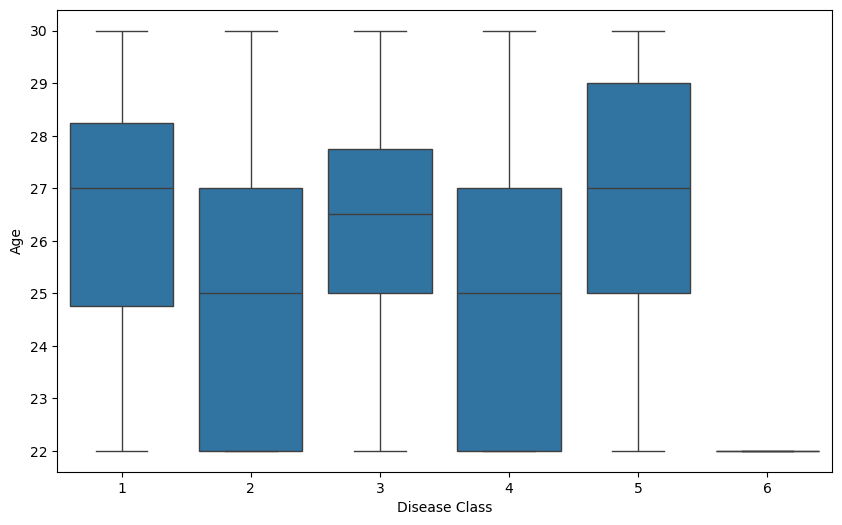

In [5]:

df_filtered = df[(df['age'] >= 22) & (df['age'] <= 30)]
correlation_filtered = df_filtered[["age", "class"]].corr(method="spearman")

#Show the diagram (boxplot) of the filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered["class"],y=df_filtered["age"])
plt.xlabel("Disease Class")
plt.ylabel("Age")
plt.show()


Distribution of each attribute: Explore the distribution of each attribute (column) in the dataset. You can use histograms or boxplots to visualize the distribution of each attribute and look for any patterns or outliers.

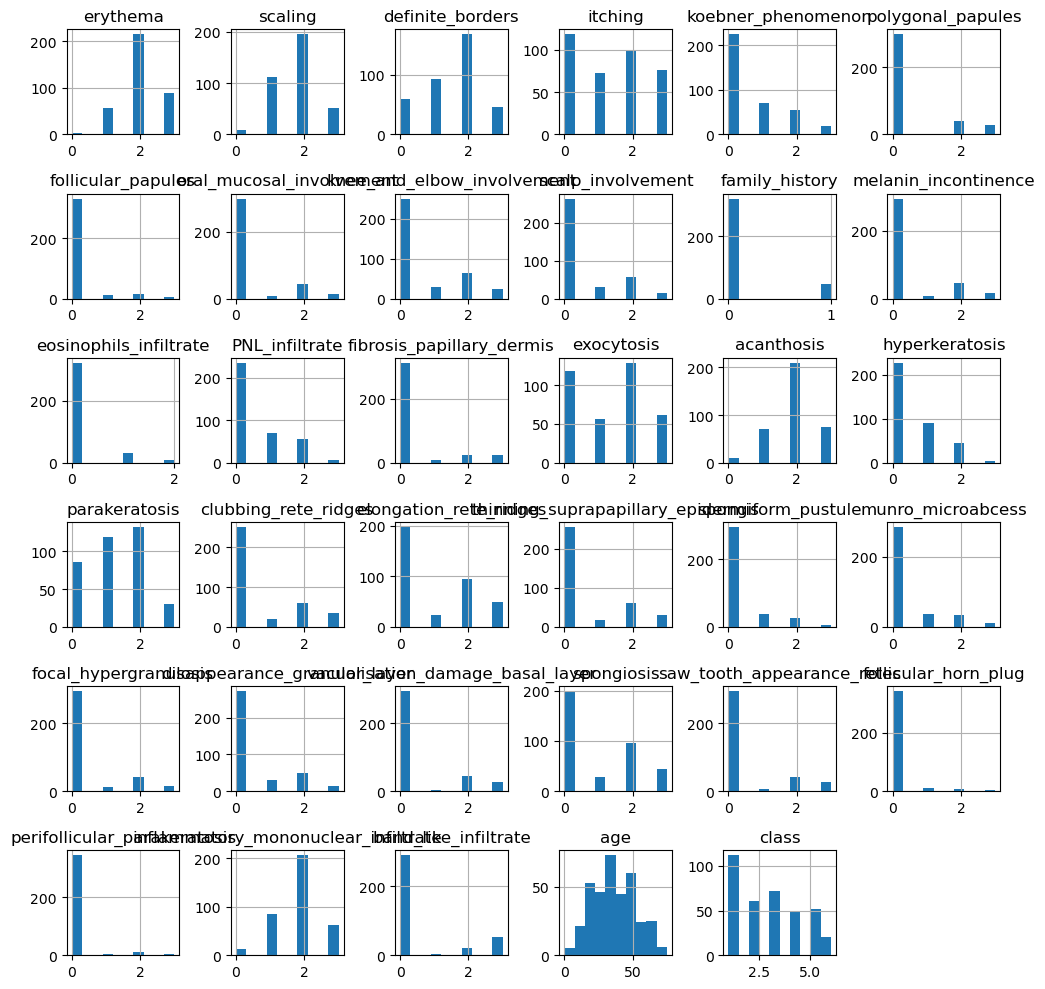

In [6]:
df.hist(figsize=(10, 10))
plt.tight_layout();
plt.show()

#### Missing values analysis

In [7]:
#Replace '?' to NaN in 'age' column
import numpy as np
df['age'] = df['age'].replace('?', np.nan)

#Convertir a numerico 
df['age'] = pd.to_numeric(df['age'],errors='coerce')

#See how many NaN values are in the 'age' column
print(df['age'].isnull().sum())

8


### Simple's Imputation method

In [8]:
# Fill NaN values with the mean of the 'age' column
df['age'].fillna(df['age'].mean(),inplace=True)

#Fill NaN values with the median of the 'age' column
df['age'].fillna(df['age'].median(),inplace=True)

#Fill NaN values with the mode of the 'age' column
df['age'].fillna(df['age'].mode(),inplace=True)

C:\Users\David\AppData\Local\Temp\ipykernel_15640\3196390063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)
C:\Users\David\AppData\Local\Temp\ipykernel_15640\3196390063.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

#### Imputation using KNN (closes neighbors)

In [9]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['age']] = imputer.fit_transform(df[['age']])

#### Which one use ?

Outliners -> Median
Variable Categorycal o repeated values -> mode
More advanced solution -> KNN

#### Class Distribution

Bar plots to visualize the number of instances for each class

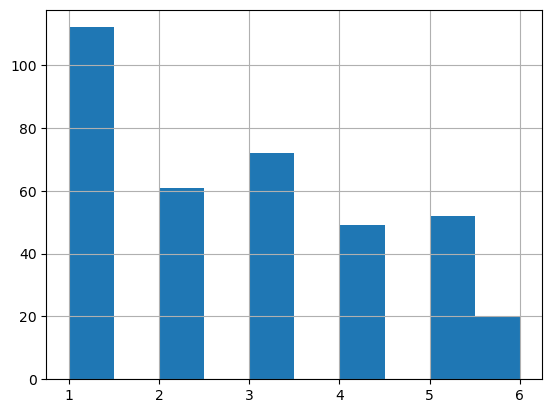

C:\Users\David\AppData\Local\Temp\ipykernel_15640\1109600087.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["class"], palette="viridis")  # Seaborn count plot for better visualization


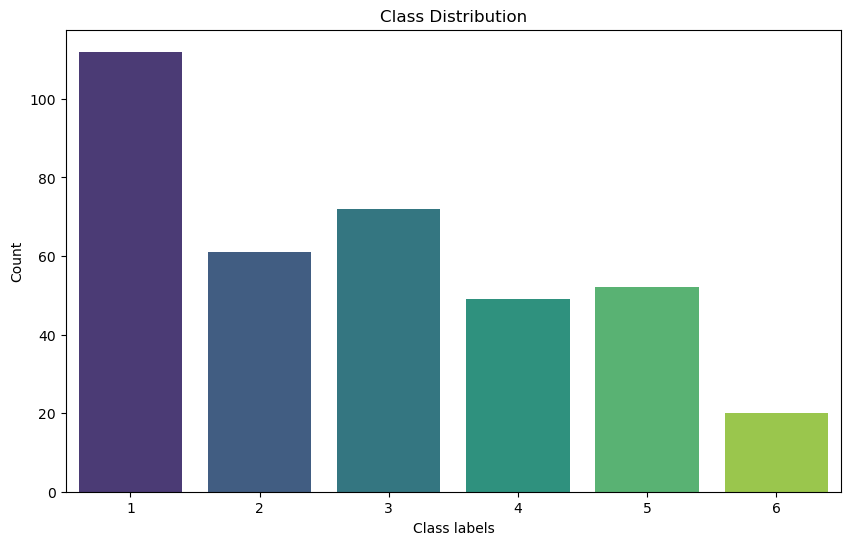

In [10]:
df['class'].hist()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# sns.barplot(x=df["class"].value_counts().index, y=df["class"].value_counts())
sns.countplot(x=df["class"], palette="viridis")  # Seaborn count plot for better visualization
plt.xlabel("Class labels")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

#### Outliners

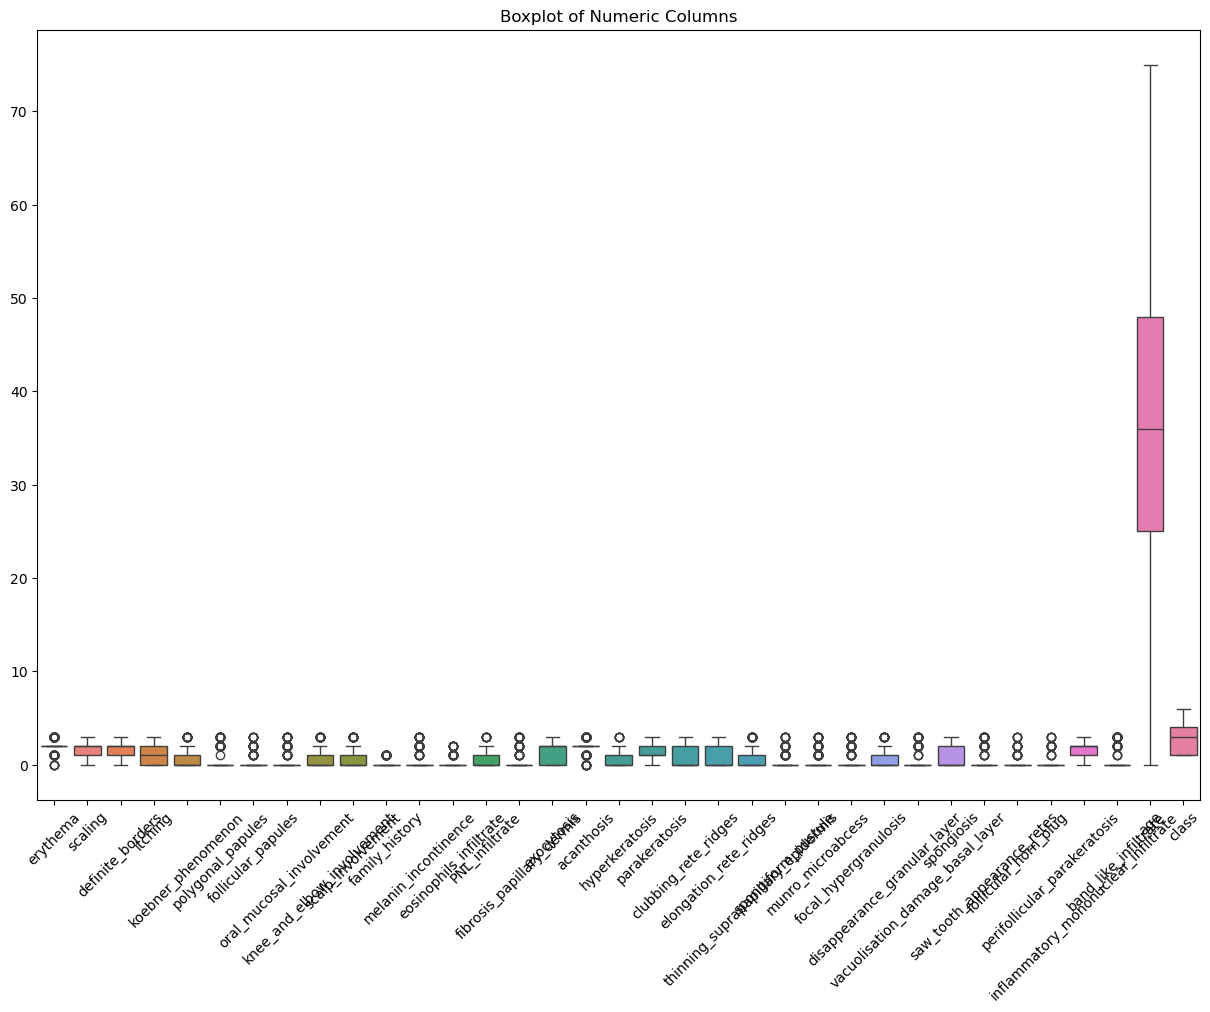

In [11]:
#Box plots

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Columns")
plt.xticks(rotation=45)
plt.show()

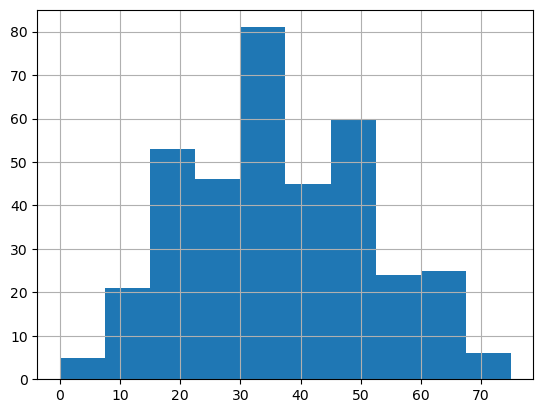

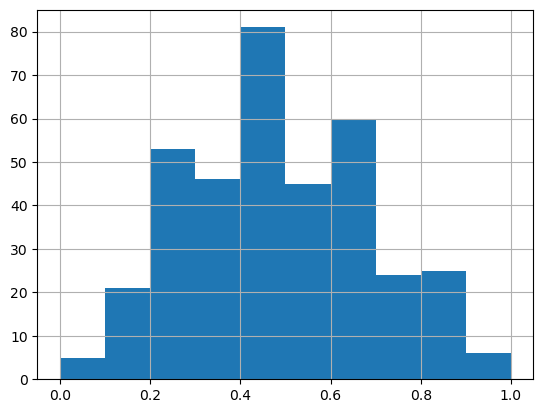

In [12]:
# Let's see the data before scaling
df['age'].hist()
plt.show()

# #Let's scaled the age column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])

#Let's see the scaled data
df['age_scaled'].hist()
plt.show()

#Using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['age_standard_scaled'] = scaler.fit_transform(df[['age']])

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df["age_robust"] = scaler.fit_transform(df[["age"]])

df.drop(["age"], axis=1, inplace=True)


#### Generate a model that can predict

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

df.columns
features = ['erythema', 'scaling', 'definite_borders', 'itching',
            'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
            'oral_mucosal_involvement', 'knee_and_elbow_involvement',
            'scalp_involvement', 'family_history', 'melanin_incontinence',
            'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
            'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
            'clubbing_rete_ridges', 'elongation_rete_ridges',
            'thinning_suprapapillary_epidermis', 'spongiform_pustule',
            'munro_microabcess', 'focal_hypergranulosis',
            'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
            'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
            'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
            'band_like_infiltrate', 'age_scaled']

X = df[features]
y = df["class"]

#Dividir en conjunto de entrenamiento y prueba (80% train, 20% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

#Hacer prediciones
y_pred = clf.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_pred))




Accuracy:  0.9864864864864865

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74


Confusion Matrix: 
 [[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
